In [ ]:
# Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Carregamento da base de dados e conversão para um dataframe
df_dados=pd.read_csv('/content/dados_financeiros_ficticios_danificados.csv')


In [ ]:
# Visualização das 5 primeiras linhas
df_dados.head()

,id_transacao,data_emissao,data_vencimento,data_pagamento,status_pagamento,produto,cliente_segmento,canal_venda,risco_credito,valor_bruto,desconto,custo_operacional
0,1,2023-06-15,2023-08-14,2023-08-04,pago,Cartão de Crédito,NaN,Online,Médio,NaN,0.0,NaN
1,2,2023-08-03,2023-09-02,NaN,Em atraso,Consórcio,PF,Agência,Baixo,-100.0,0.0,NaN
2,3,2023-01-26,2023-03-27,2023-03-19,Pago,Financiamento,NaN,Online,Alto,-100.0,NaN,302.12
3,4,2023-02-22,2023-04-23,NaN,Vencido,Consórcio,PF,Agência,NaN,NaN,0.0,NaN
4,5,2024-02-02,2024-05-02,2024-04-23,pago,Financiamento,PF,Agência,Baixo,-100.0,100.0,NaN


In [ ]:
# Visualização das 5 últimas linhas
df_dados.tail()

,id_transacao,data_emissao,data_vencimento,data_pagamento,status_pagamento,produto,cliente_segmento,canal_venda,risco_credito,valor_bruto,desconto,custo_operacional
295,296,2023-12-06,2024-03-05,2024-02-26,pago,Cartão de Crédito,PJ,Agência,NaN,NaN,0.0,NaN
296,297,2023-06-06,2023-08-05,NaN,Em atraso,Seguro,NaN,NaN,Médio,NaN,100.0,NaN
297,298,2023-04-13,NaN,NaN,Pago,Seguro,NaN,Representante,Baixo,18312.71,0.0,NaN
298,299,2023-05-30,2023-07-29,NaN,Em atraso,Seguro,NaN,NaN,Médio,NaN,NaN,445.13
299,300,2023-04-03,NaN,NaN,Pago,Financiamento,PF,Agência,NaN,1509.39,NaN,NaN


In [ ]:
# Vizualizando tipo dos dados e valores ausentes(nulos)
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_transacao       300 non-null    int64  
 1   data_emissao       300 non-null    object 
 2   data_vencimento    239 non-null    object 
 3   data_pagamento     111 non-null    object 
 4   status_pagamento   300 non-null    object 
 5   produto            300 non-null    object 
 6   cliente_segmento   200 non-null    object 
 7   canal_venda        242 non-null    object 
 8   risco_credito      222 non-null    object 
 9   valor_bruto        204 non-null    float64
 10  desconto           220 non-null    float64
 11  custo_operacional  145 non-null    float64
dtypes: float64(3), int64(1), object(8)
memory usage: 28.3+ KB


In [ ]:
# Total de valores nulos por categoria
df_dados.isnull().sum() # --> existe valores nulos

,0
id_transacao,0
data_emissao,0
data_vencimento,61
data_pagamento,189
status_pagamento,0
produto,0
cliente_segmento,100
canal_venda,58
risco_credito,78
valor_bruto,96


In [ ]:

# Porcentagem dos valores nulos sobre o total de dados, por categoria
porcentagem_valores_nulos= (df_dados.isnull().sum() / len(df_dados)) *100
porcentagem_valores_nulos
# O resultado exibir impacto dos valores nulos na base, tendo como consequência uma análise ruim.

,0
id_transacao,0.000000
data_emissao,0.000000
data_vencimento,20.333333
data_pagamento,63.000000
status_pagamento,0.000000
produto,0.000000
cliente_segmento,33.333333
canal_venda,19.333333
risco_credito,26.000000
valor_bruto,32.000000


In [ ]:
# Medidas estátistica dos dados
df_dados.describe()

# Na coluna valor_bruto é possível nota desvio padrão alto, sendo influênciado por valores ausentes ou valores negativos.
# Na coluna desconto o menor valor é 0, o que pode indicar presença de outliers.

,id_transacao,valor_bruto,desconto,custo_operacional
count,300.000000,204.000000,220.000000,145.000000
mean,150.500000,6509.702794,49.318182,278.122621
std,86.746758,7968.313756,39.250846,129.514423
min,1.000000,-100.000000,0.000000,54.830000
25%,75.750000,-100.000000,0.000000,165.650000
50%,150.500000,1664.265000,50.000000,267.730000
75%,225.250000,13865.875000,100.000000,388.800000
max,300.000000,24497.360000,100.000000,499.740000


In [ ]:
# Verifcando presença de outliers

# Lista para armazenar nomes de colunas que possuem valores númericos
lista_colunas_numericas=['desconto','valor_bruto','id_transacao','custo_operacional']


# função para verificar presença de outliers
def verificar_outliers(coluna):
    Q1 = coluna.quantile(0.25)
    Q3 = coluna.quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = coluna[(coluna < limite_inferior) | (coluna > limite_superior)]

    return outliers

# laço para percorrer cada coluna do dataframe
for elemento in lista_colunas_numericas:
  outlier_variavel=verificar_outliers(df_dados[elemento])
  print(outlier_variavel)


  # Embora o método do IQR não tenha identificado outliers estatísticos nas variáveis numéricas,
  # a análise descritiva revelou valores inconsistentes, como valores negativos em valor_bruto e alta dispersão dos dados,
  # indicando possíveis problemas de qualidade dos dados.

Series([], Name: desconto, dtype: float64)
Series([], Name: valor_bruto, dtype: float64)
Series([], Name: id_transacao, dtype: int64)
Series([], Name: custo_operacional, dtype: float64)


Tratamento de valores ausentes: valores catégoricos

In [ ]:
# Preenchimento de valores catégoricos com Moda (valor mais frêquente).
# A decisão de realizar a imputação se deve pelas variáveis terem forte impacto na análise assim como na identificação de padrôes.


moda1=df_dados['cliente_segmento'].mode()[0]
df_dados['cliente_segmento']=df_dados['cliente_segmento'].fillna(moda1)


moda2=df_dados['risco_credito'].mode()[0]
df_dados['risco_credito']=df_dados['risco_credito'].fillna(moda2)


moda3=df_dados['canal_venda'].mode()[0]
df_dados['canal_venda']=df_dados['canal_venda'].fillna(moda3)


df_dados


,id_transacao,data_emissao,data_vencimento,data_pagamento,status_pagamento,produto,cliente_segmento,canal_venda,risco_credito,valor_bruto,desconto,custo_operacional
0,1,2023-06-15,2023-08-14,2023-08-04,pago,Cartão de Crédito,PF,Online,Médio,NaN,0.0,NaN
1,2,2023-08-03,2023-09-02,NaN,Em atraso,Consórcio,PF,Agência,Baixo,-100.00,0.0,NaN
2,3,2023-01-26,2023-03-27,2023-03-19,Pago,Financiamento,PF,Online,Alto,-100.00,NaN,302.12
3,4,2023-02-22,2023-04-23,NaN,Vencido,Consórcio,PF,Agência,Alto,NaN,0.0,NaN
4,5,2024-02-02,2024-05-02,2024-04-23,pago,Financiamento,PF,Agência,Baixo,-100.00,100.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,2023-12-06,2024-03-05,2024-02-26,pago,Cartão de Crédito,PJ,Agência,Alto,NaN,0.0,NaN
296,297,2023-06-06,2023-08-05,NaN,Em atraso,Seguro,PF,Representante,Médio,NaN,100.0,NaN
297,298,2023-04-13,NaN,NaN,Pago,Seguro,PF,Representante,Baixo,18312.71,0.0,NaN
298,299,2023-05-30,2023-07-29,NaN,Em atraso,Seguro,PF,Representante,Médio,NaN,NaN,445.13


In [ ]:
# Verifcando se ainda a valores nulos para colunas já imputadas
df_dados.isnull().sum() #--> 0 valores nulos.

,0
id_transacao,0
data_emissao,0
data_vencimento,61
data_pagamento,189
status_pagamento,0
produto,0
cliente_segmento,0
canal_venda,0
risco_credito,0
valor_bruto,96


Tratamento de valores ausentes: númericos

In [ ]:
# Últilizarei a mediana para realizar a imputação dos dados númericos,
# essa decisão possui influência dos resultados antes analisados, como valores nulos e suspeita de outliers

# laço para realizar cálculos por cada variável númerica e realizar a imputação: nulo --> mediana
for elemento in lista_colunas_numericas:
 mediana=df_dados[elemento].median()
 df_dados[elemento]=df_dados[elemento].fillna(mediana)

In [ ]:
# verificação de valores nulos nas colunas já tratadas
df_dados.isnull().sum() # --> zero valores nulos.

,0
id_transacao,0
data_emissao,0
data_vencimento,61
data_pagamento,189
status_pagamento,0
produto,0
cliente_segmento,0
canal_venda,0
risco_credito,0
valor_bruto,0


Tratamento de valores nulos: data_pagamento & data_vencimento

In [ ]:
# Optei por realiza a imputação, em casos onde houve ao menos uma data preenchida esse valor
# será ultilizado para ocupa a data ausente da outra coluna.
# Em caso contrário a data permanece NAN.


# Transformando colunas do tipo object para datatime64
df_dados['data_pagamento']=pd.to_datetime(df_dados['data_pagamento'],errors='coerce')
df_dados['data_vencimento']=pd.to_datetime(df_dados['data_vencimento'],errors='coerce')

df_dados.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_transacao       300 non-null    int64         
 1   data_emissao       300 non-null    object        
 2   data_vencimento    239 non-null    datetime64[ns]
 3   data_pagamento     111 non-null    datetime64[ns]
 4   status_pagamento   300 non-null    object        
 5   produto            300 non-null    object        
 6   cliente_segmento   300 non-null    object        
 7   canal_venda        300 non-null    object        
 8   risco_credito      300 non-null    object        
 9   valor_bruto        300 non-null    float64       
 10  desconto           300 non-null    float64       
 11  custo_operacional  300 non-null    float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(6)
memory usage: 28.3+ KB


In [ ]:

# Criação de uma nova coluna contendo a imputação
df_dados['data_referencia'] = df_dados['data_vencimento'].combine_first(df_dados['data_pagamento'])

df_dados[['data_pagamento','data_vencimento','data_referencia']].head(20)



,data_pagamento,data_vencimento,data_referencia
0,2023-08-04,2023-08-14,2023-08-14
1,NaT,2023-09-02,2023-09-02
2,2023-03-19,2023-03-27,2023-03-27
3,NaT,2023-04-23,2023-04-23
4,2024-04-23,2024-05-02,2024-05-02
5,2024-06-18,2024-06-22,2024-06-22
6,2023-08-26,2023-09-03,2023-09-03
7,2024-07-17,2024-07-27,2024-07-27
8,NaT,NaT,NaT
9,NaT,NaT,NaT


# Visualização de dados com gráficos

In [ ]:
df_dados

,id_transacao,data_emissao,data_vencimento,data_pagamento,status_pagamento,produto,cliente_segmento,canal_venda,risco_credito,valor_bruto,desconto,custo_operacional,data_referencia
0,1,2023-06-15,2023-08-14,2023-08-04,pago,Cartão de Crédito,PF,Online,Médio,1664.265,0.0,267.73,2023-08-14
1,2,2023-08-03,2023-09-02,NaT,Em atraso,Consórcio,PF,Agência,Baixo,-100.000,0.0,267.73,2023-09-02
2,3,2023-01-26,2023-03-27,2023-03-19,Pago,Financiamento,PF,Online,Alto,-100.000,50.0,302.12,2023-03-27
3,4,2023-02-22,2023-04-23,NaT,Vencido,Consórcio,PF,Agência,Alto,1664.265,0.0,267.73,2023-04-23
4,5,2024-02-02,2024-05-02,2024-04-23,pago,Financiamento,PF,Agência,Baixo,-100.000,100.0,267.73,2024-05-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,2023-12-06,2024-03-05,2024-02-26,pago,Cartão de Crédito,PJ,Agência,Alto,1664.265,0.0,267.73,2024-03-05
296,297,2023-06-06,2023-08-05,NaT,Em atraso,Seguro,PF,Representante,Médio,1664.265,100.0,267.73,2023-08-05
297,298,2023-04-13,NaT,NaT,Pago,Seguro,PF,Representante,Baixo,18312.710,0.0,267.73,NaT
298,299,2023-05-30,2023-07-29,NaT,Em atraso,Seguro,PF,Representante,Médio,1664.265,50.0,445.13,2023-07-29


O gráfico a seguir exibir a concentração de clientes nos status de pagamento

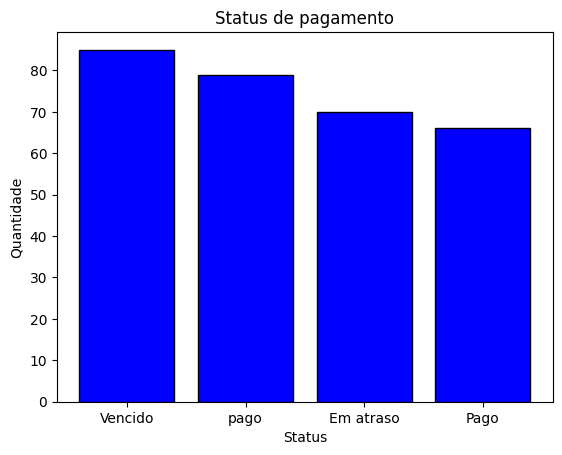

In [ ]:


filtro=df_dados['status_pagamento'].value_counts()


import matplotlib.pyplot as plt

# Dados
categorias = filtro.index
valores = filtro.values

# Criando o gráfico
plt.bar(categorias, valores, color='blue', edgecolor='black')

# Customização
plt.title('Status de pagamento')
plt.xlabel('Status')
plt.ylabel('Quantidade')

plt.show()

# Vencido se destaca, além de uma forte concentração de pagamento em atraso

O gráfico abaixo exibir total de clientes nos produto oferecidos


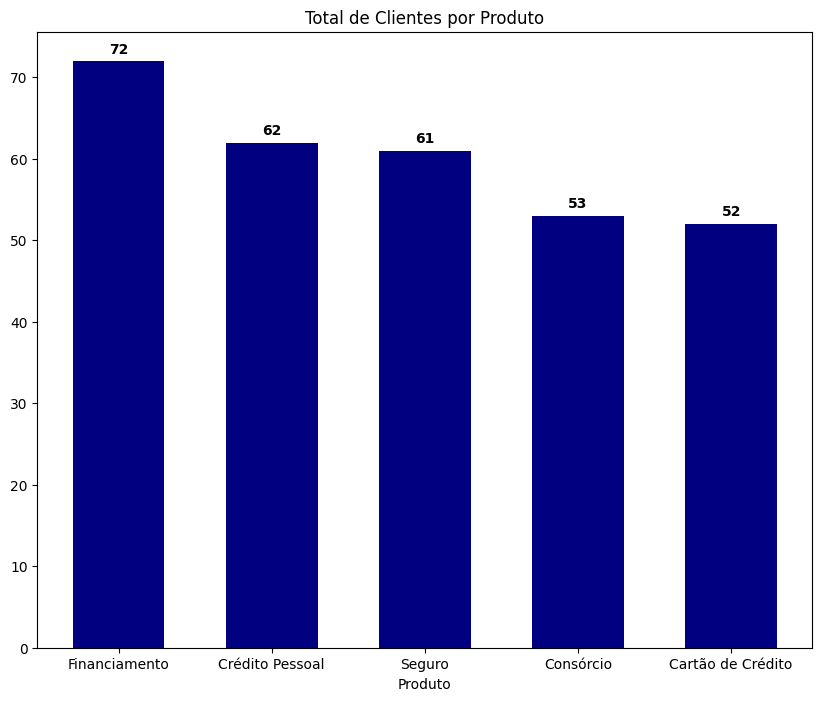

In [ ]:
filtro2 = df_dados['produto'].value_counts()


plt.figure(figsize=(10,8))
# Dados
produto = filtro2.index
total = filtro2.values

# Criando as colunas verticais
plt.bar(produto, total, color='navy', width=0.6)

# Adicionando rótulos e título

plt.xlabel('Produto')
plt.title('Total de Clientes por Produto')


# Exibir valores acima das colunas
for i, v in enumerate(total):
    plt.text(i, v + 1, str(v), ha='center', fontweight='bold')

plt.show()

# Maior concentração em financiamento & Crédito pessoal

O gráfico abaixo mostrar a prorpoção de clientes segmento e qual categoria possui maior concentração

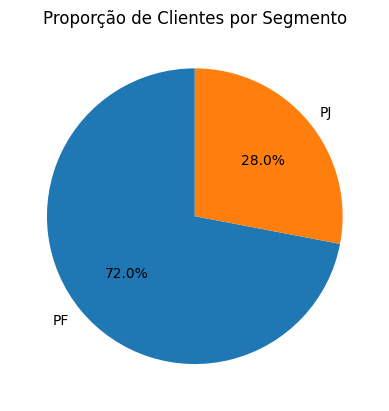

In [ ]:
filtro3=df_dados['cliente_segmento'].value_counts()

# Dados: valores e seus nomes
quantidade_cliente = filtro3.values
tipo_cliente = filtro3.index

# Criar o gráfico
plt.pie(quantidade_cliente, labels=tipo_cliente, autopct='%1.1f%%', startangle=90)

# Adicionar título
plt.title('Proporção de Clientes por Segmento')

# Exibir
plt.show()

# PF ocupa mais que a metade do gráfico, estimando que esse seja o principal tipo de clientes.

O gráfico de barra abaixo possui intuito de exibir em porcentagem o risco de crédito

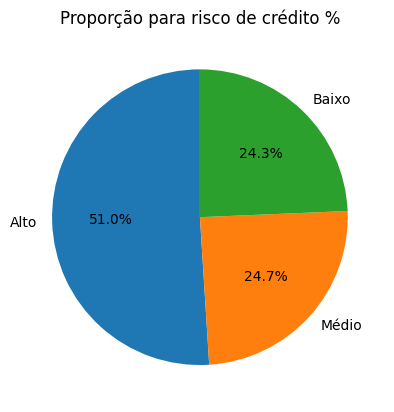

In [ ]:
filtro4=df_dados['risco_credito'].value_counts()

# Dados: valores e seus nomes
percentual = filtro4.values
tipo_risco = filtro4.index

# Criar o gráfico
plt.pie(percentual, labels=tipo_risco, autopct='%1.1f%%', startangle=90)

# Adicionar título
plt.title('Proporção para risco de crédito %')

# Exibir
plt.show()

# Risto alto se destacar refroçando atenção